In [1]:
# Step 1: Load & Explore the Data
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:

# Load the dataset
df = pd.read_csv('owid-covid-data.csv')

In [3]:
# Display shape and columns
print("Shape of dataset:", df.shape)
print("\nColumn names:\n", df.columns.tolist())

Shape of dataset: (429435, 67)

Column names:
 ['iso_code', 'continent', 'location', 'date', 'total_cases', 'new_cases', 'new_cases_smoothed', 'total_deaths', 'new_deaths', 'new_deaths_smoothed', 'total_cases_per_million', 'new_cases_per_million', 'new_cases_smoothed_per_million', 'total_deaths_per_million', 'new_deaths_per_million', 'new_deaths_smoothed_per_million', 'reproduction_rate', 'icu_patients', 'icu_patients_per_million', 'hosp_patients', 'hosp_patients_per_million', 'weekly_icu_admissions', 'weekly_icu_admissions_per_million', 'weekly_hosp_admissions', 'weekly_hosp_admissions_per_million', 'total_tests', 'new_tests', 'total_tests_per_thousand', 'new_tests_per_thousand', 'new_tests_smoothed', 'new_tests_smoothed_per_thousand', 'positive_rate', 'tests_per_case', 'tests_units', 'total_vaccinations', 'people_vaccinated', 'people_fully_vaccinated', 'total_boosters', 'new_vaccinations', 'new_vaccinations_smoothed', 'total_vaccinations_per_hundred', 'people_vaccinated_per_hundred',

In [4]:

# Preview data: Display the first few rows
print(df.head())


  iso_code continent     location        date  total_cases  new_cases  \
0      AFG      Asia  Afghanistan  2020-01-05          0.0        0.0   
1      AFG      Asia  Afghanistan  2020-01-06          0.0        0.0   
2      AFG      Asia  Afghanistan  2020-01-07          0.0        0.0   
3      AFG      Asia  Afghanistan  2020-01-08          0.0        0.0   
4      AFG      Asia  Afghanistan  2020-01-09          0.0        0.0   

   new_cases_smoothed  total_deaths  new_deaths  new_deaths_smoothed  ...  \
0                 NaN           0.0         0.0                  NaN  ...   
1                 NaN           0.0         0.0                  NaN  ...   
2                 NaN           0.0         0.0                  NaN  ...   
3                 NaN           0.0         0.0                  NaN  ...   
4                 NaN           0.0         0.0                  NaN  ...   

   male_smokers  handwashing_facilities  hospital_beds_per_thousand  \
0           NaN            

In [5]:
# Check for missing values
print(df.isnull().sum())

iso_code                                        0
continent                                   26525
location                                        0
date                                            0
total_cases                                 17631
                                            ...  
population                                      0
excess_mortality_cumulative_absolute       416024
excess_mortality_cumulative                416024
excess_mortality                           416024
excess_mortality_cumulative_per_million    416024
Length: 67, dtype: int64


In [6]:
# Step 2: Clean the Data

# Convert 'date' column to datetime
df['date'] = pd.to_datetime(df['date'])


In [7]:

# Filter data for selected countries
countries = ['Kenya', 'United States', 'India']
df_filtered = df[df['location'].isin(countries)]


In [8]:
# Drop rows with missing total_cases or total_deaths
df_filtered = df_filtered.dropna(subset=['total_cases', 'total_deaths'])

In [9]:
# Fill other missing values with 0 (for plotting purposes)
df_filtered.fillna(0, inplace=True)

In [10]:
# Check the cleaned data
print(df_filtered[['location', 'date', 'total_cases', 'total_deaths', 'total_vaccinations']].head())

       location       date  total_cases  total_deaths  total_vaccinations
173549    India 2020-01-05          0.0           0.0                 0.0
173550    India 2020-01-06          0.0           0.0                 0.0
173551    India 2020-01-07          0.0           0.0                 0.0
173552    India 2020-01-08          0.0           0.0                 0.0
173553    India 2020-01-09          0.0           0.0                 0.0


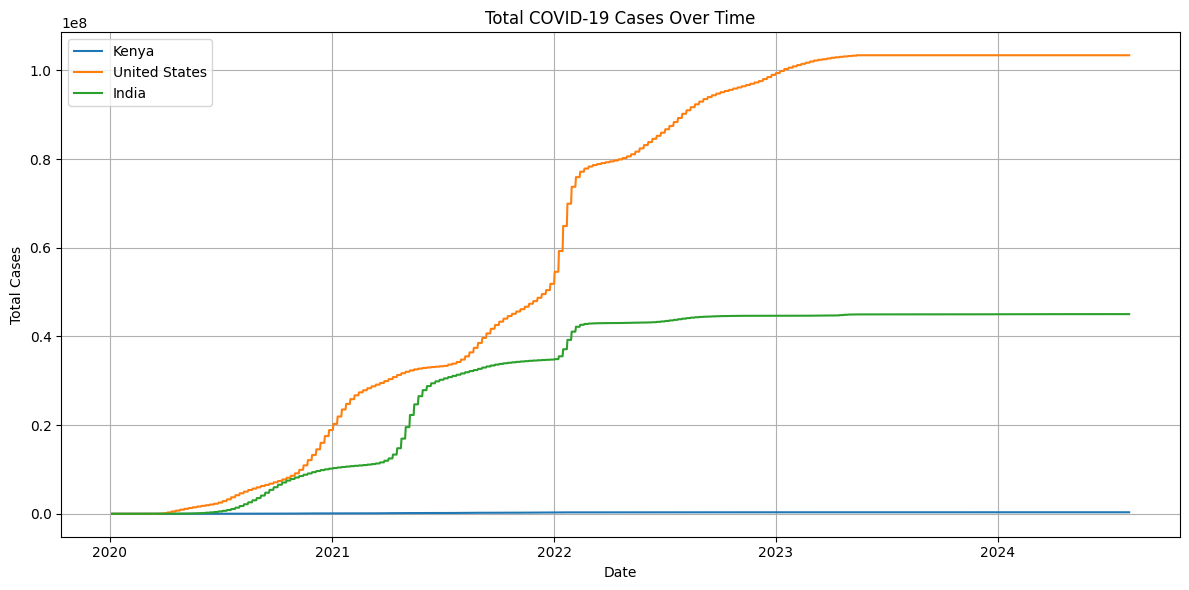

In [11]:
# Step 3: Visualizing Cases & Deaths

# Step 3A: Plot total COVID-19 cases over time

plt.figure(figsize=(12, 6))
for country in countries:
    country_data = df_filtered[df_filtered['location'] == country]
    plt.plot(country_data['date'], country_data['total_cases'], label=country)

plt.title('Total COVID-19 Cases Over Time')
plt.xlabel('Date')
plt.ylabel('Total Cases')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


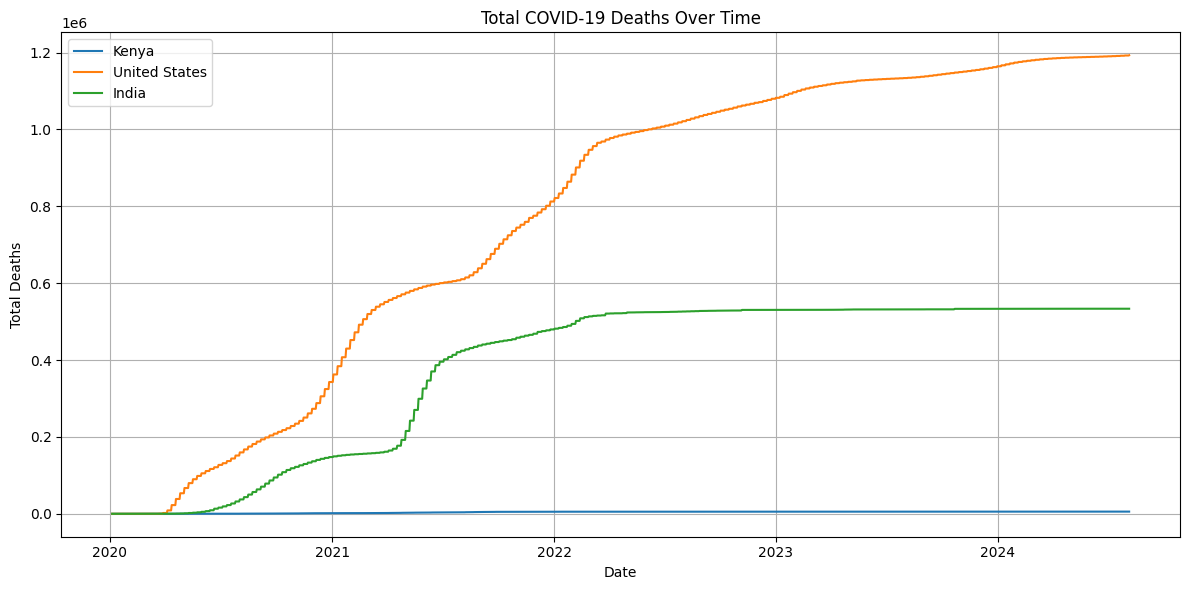

In [12]:
# Step 3B: Plot total deaths over time

plt.figure(figsize=(12, 6))
for country in countries:
    country_data = df_filtered[df_filtered['location'] == country]
    plt.plot(country_data['date'], country_data['total_deaths'], label=country)

plt.title('Total COVID-19 Deaths Over Time')
plt.xlabel('Date')
plt.ylabel('Total Deaths')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


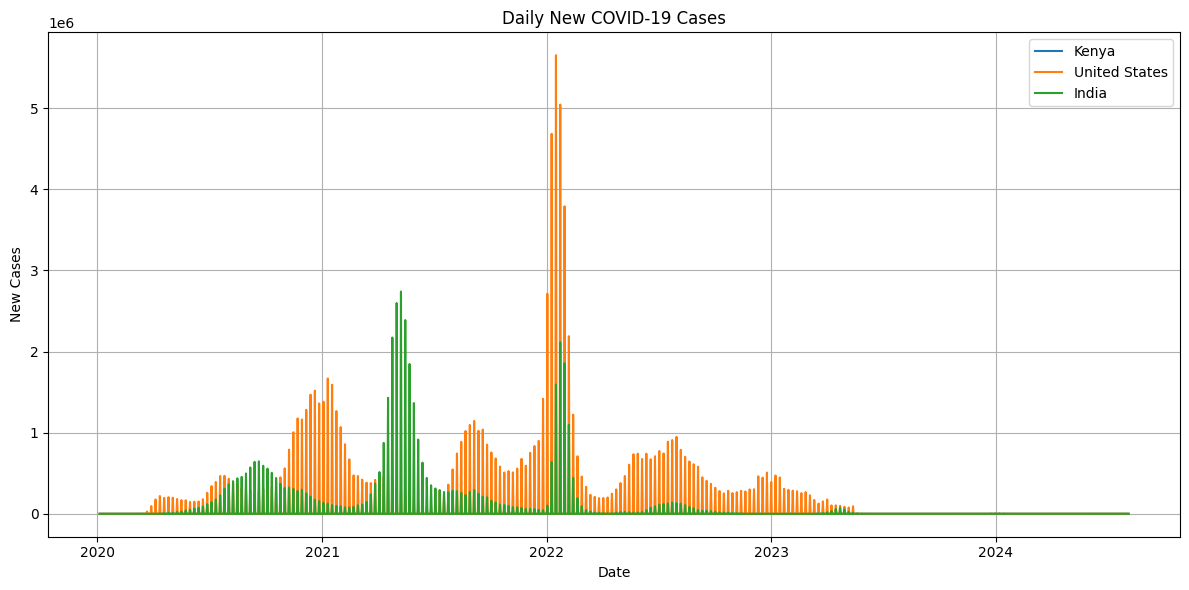

In [13]:
# Step 3C: Plot daily new cases (new_cases column)

plt.figure(figsize=(12, 6))
for country in countries:
    country_data = df_filtered[df_filtered['location'] == country]
    plt.plot(country_data['date'], country_data['new_cases'], label=country)

plt.title('Daily New COVID-19 Cases')
plt.xlabel('Date')
plt.ylabel('New Cases')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


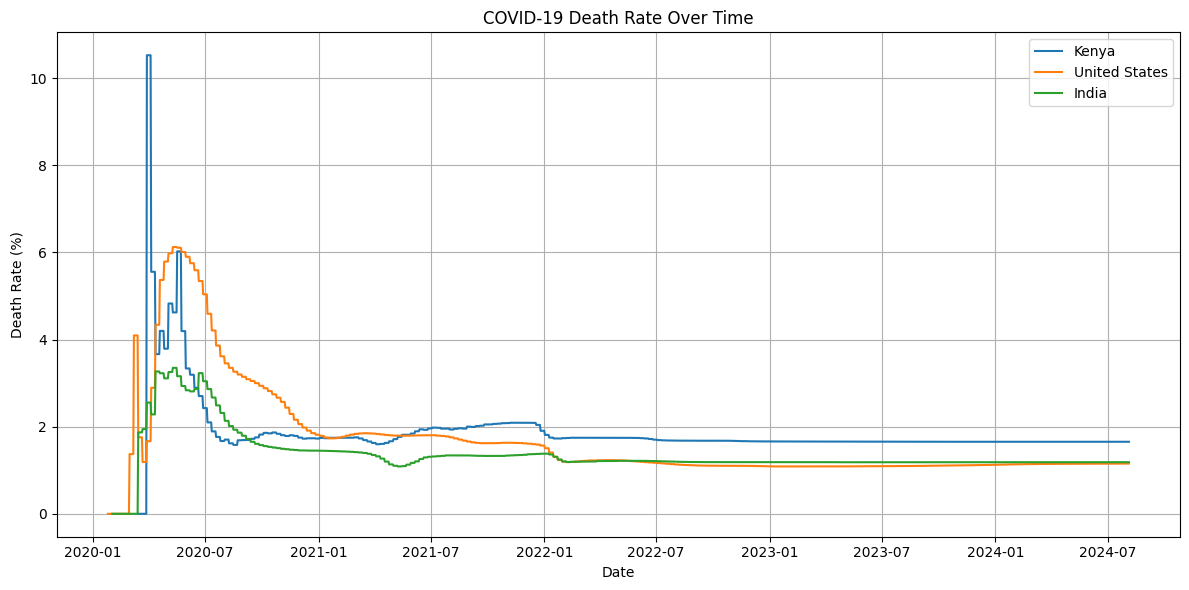

In [14]:
# Step 3D: Calculate and plot death rate (total_deaths / total_cases * 100)

plt.figure(figsize=(12, 6))
for country in countries:
    country_data = df_filtered[df_filtered['location'] == country].copy()
    country_data['death_rate'] = (country_data['total_deaths'] / country_data['total_cases']) * 100
    plt.plot(country_data['date'], country_data['death_rate'], label=country)

plt.title('COVID-19 Death Rate Over Time')
plt.xlabel('Date')
plt.ylabel('Death Rate (%)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


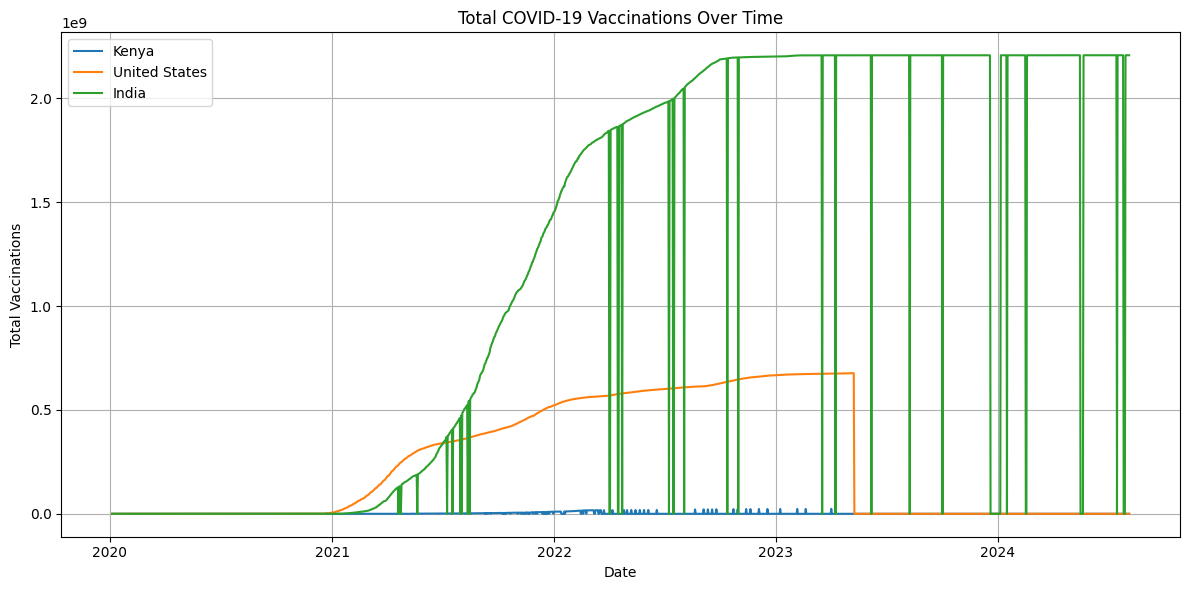

In [15]:
# Step 4: Visualizing Vaccinations
# Step 4A: Plot total vaccinations over time

plt.figure(figsize=(12, 6))
for country in countries:
    country_data = df_filtered[df_filtered['location'] == country]
    plt.plot(country_data['date'], country_data['total_vaccinations'], label=country)

plt.title('Total COVID-19 Vaccinations Over Time')
plt.xlabel('Date')
plt.ylabel('Total Vaccinations')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


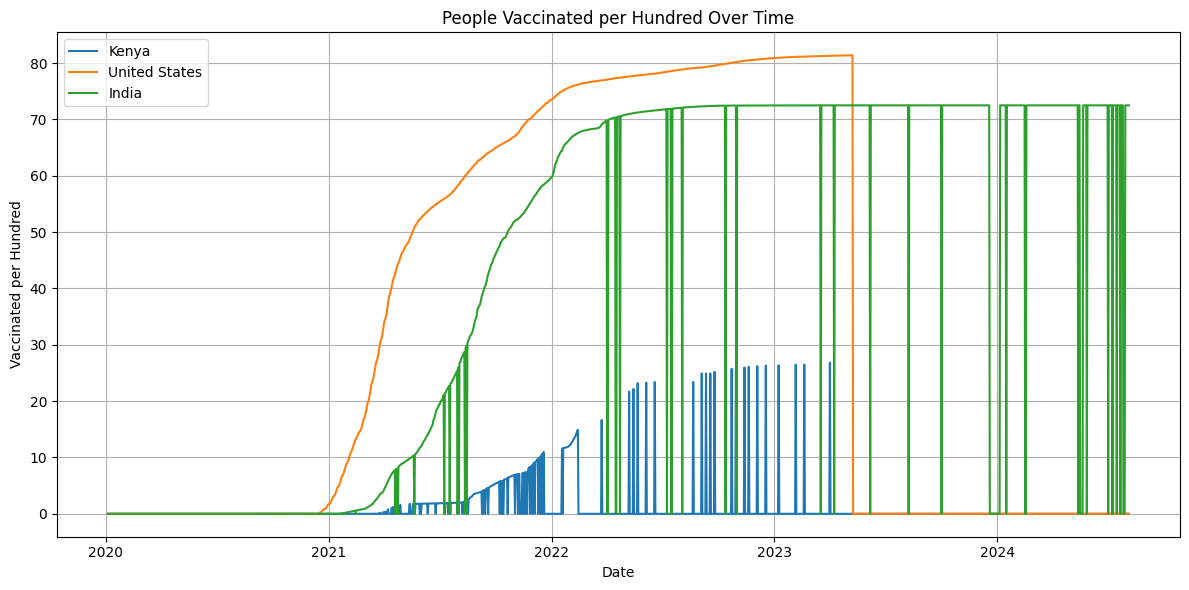

In [16]:
# Step 4B: Plot % of population vaccinated (people_vaccinated_per_hundred)

plt.figure(figsize=(12, 6))
for country in countries:
    country_data = df_filtered[df_filtered['location'] == country]
    plt.plot(country_data['date'], country_data['people_vaccinated_per_hundred'], label=country)

plt.title('People Vaccinated per Hundred Over Time')
plt.xlabel('Date')
plt.ylabel('Vaccinated per Hundred')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [17]:
# Step 5: Build a Choropleth Map with Plotly

import plotly.express as px

# Step 5A: Prepare latest data for the choropleth map
latest_date = df['date'].max()
df_latest = df[df['date'] == latest_date]

# Keep only required columns and drop missing values
map_df = df_latest[['iso_code', 'location', 'total_cases']].dropna()

# Step 5B: Create choropleth map
fig = px.choropleth(
    map_df,
    locations='iso_code',
    color='total_cases',
    hover_name='location',
    color_continuous_scale='Reds',
    title=f'COVID-19 Total Cases by Country as of {latest_date.date()}'
)

fig.update_layout(geo=dict(showframe=False, showcoastlines=False))
fig.show()


In [18]:
# Step 5C: Prepare data for vaccination choropleth map
vacc_map_df = df_latest[['iso_code', 'location', 'people_vaccinated_per_hundred']].dropna()

# Step 5D: Create choropleth map for vaccination rates
fig = px.choropleth(
    vacc_map_df,
    locations='iso_code',
    color='people_vaccinated_per_hundred',
    hover_name='location',
    color_continuous_scale='Greens',
    title=f'COVID-19 Vaccination Rate (per 100 people) by Country as of {latest_date.date()}'
)

fig.update_layout(geo=dict(showframe=False, showcoastlines=False))
fig.show()
